In [4]:
import pandas as pd
import quandl
quandl.ApiConfig.api_key = "ahusCyz3XW_m2foq4TzM" 

df = quandl.get("WIKI/GOOGL")

print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [5]:
import pandas as pd
import quandl
quandl.ApiConfig.api_key = "ahusCyz3XW_m2foq4TzM"
import math
df = quandl.get('WIKI/GOOGL')

df = df[['Adj. Open','Adj. Close','Adj. High','Adj. Low','Adj. Volume']]
df['HL_PCT'] = ((df['Adj. High'] - df['Adj. Close']) / df['Adj. Close']) * 100.0 
# this defines the percentage change in price of the stocks
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
# this defines the daily percentage change in price of the stocks
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
# these are the columns that we actually care about
# print(df.head())
# forecast_col =[]
forecast_col = 'Adj. Close'
df.fillna(-99999,inplace=True)
forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df['forecast_col'].shift(-forecast_out)
print(df.head())

KeyError: 'forecast_col'

[1102.40653135 1074.27320914 1021.35147704 1060.38337485 1074.47551193
 1074.87267091 1092.90488339 1111.66534532 1116.46086098 1124.19505849
 1134.16625103 1130.84176606 1149.4888401  1165.63394733 1137.70305239
 1124.1098682  1089.50635414 1103.66413007 1115.18178352 1122.48965619
 1135.94304444 1151.17470366 1182.15776367 1187.59056266 1159.29816346
 1170.48239352 1171.69780228 1154.87181371 1119.62671874 1116.06342683
 1114.60619599 1071.59787629 1044.37450618 1071.80912114 1022.08380999] 0.9792957279682746 35


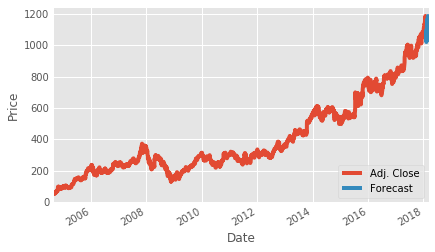

In [40]:
import pandas as pd
import quandl,datetime
quandl.ApiConfig.api_key = "ahusCyz3XW_m2foq4TzM"
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
import math
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

# style.use('ggplot')



df = quandl.get('WIKI/GOOGL')

df = df[['Adj. Open','Adj. Close','Adj. High','Adj. Low','Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
# defines the time in the future from which we would like to predict the answer

df['label'] = df[forecast_col].shift(-forecast_out)
# here -forecast_out means the value by which we would like the values in the table to be shifted in the upward direction
# means the numbe of days in the future to which our prediction predicts
# print(forecast_out)

X = np.array(df.drop(['label'],1))
# df.drop returns a new dataframe

X = preprocessing.scale(X)
# Feature scaling (also known as data normalization) is the method used to standardize the range of features of data.
# Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing 
# while using machine learning algorithms

# feature scaling is only required if we minimise the error in our intial assumption by gradient descent 
# if we use normal equation in place of gradient descent then feature scaling or mean normalisation is not required

X_lately = X[-forecast_out:]
# means that we only have the last 35 elements in X_lately

X = X[:-forecast_out]
# means that we have dropped the last 35 elements from X



df.dropna(inplace=True)
y = np.array(df['label'])

# print(len(X),len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# test_size=0.2 means that we are using 20% of the data to test the model and the rest of the data to train the model 

# clf = LinearRegression()

# clf.fit(X_train, y_train)
# # trains the model to fit the training data

# with open('linearregression.pickle', 'wb') as f:
#     pickle.dump(clf,f)
pickle_in = open('linearregression.pickle','rb') 
clf = pickle.load(pickle_in)

accuracy = clf.score(X_test, y_test)

forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

df['Forecast'] = np.nan
# initialises the column 'Forecast' as NaN = not a number

last_date = df.iloc[-1].name

last_unix = last_date.timestamp()
one_day = 86400
# no of seconds in a day
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# pickle is the serialisation of any python object such as a dictionary or a classification 



0.42857142857142866 4.0


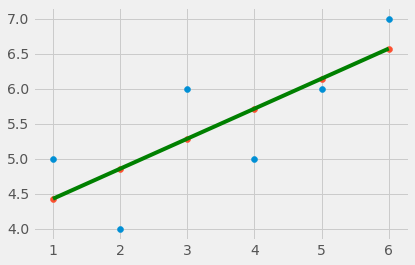

In [21]:
# slope of line in linear regression
#  m = ((mean(x)*mean(y))-(mean(x*y)))/
#        ((mean(x)**2)-(mean(x**2)))
# intercept of the line 
# c = mean(y)-(m*mean(x))

from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

xs = np.array([1,2,3,4,5,6], dtype = np.float64)
ys = np.array([5,4,6,5,6,7], dtype = np.float64)

plt.scatter(xs,ys)
# plt.plot(xs,ys)
# plt.show()

def best_fit_slope_and_intercept(xs,ys):
    m = ((mean(xs)*mean(ys))-(mean(xs*ys)))/(((mean(xs))**2)-(mean(xs**2)))
    c = mean(ys)-(m*(mean(xs)))
    
    return m,c
     

m,c = best_fit_slope_and_intercept(xs,ys)
print(m,c)

# def best_fit_intercept(xs,ys,m):
#     c = mean(ys)-(m*(mean(xs)))
#     return c

# c = best_fit_intercept(xs,ys,m)
# print(c)
# plt.scatter(xs,(m*xs)+c)
# plt.plot(xs,(m*xs)+c)
# plt.show()

regression_line = [(m*x)+c for x in xs]
plt.scatter(xs,regression_line)
plt.plot(xs,regression_line,color = 'g')
plt.show()

2.0254221388367735 -0.320731707317087


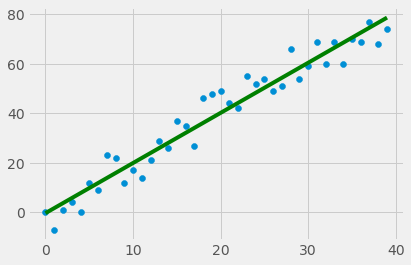

0.9441130019532739


In [38]:
# coefficient of determination
# r**2 (r square) is the coefficient of determination

from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random
style.use('fivethirtyeight')

# xs = np.array([1,2,3,4,5,6], dtype = np.float64)
# ys = np.array([5,4,6,5,6,7], dtype = np.float64)

# plt.scatter(xs,ys)
# plt.plot(xs,ys)
# plt.show()

# hm - how much = how many data points do I wish to create
# varience = how varible do we want the data set to be
# step = how far on average to step up the y value per point
# correlation = is this is true then the step will be a positive no
#               if this is false then the step will be a negative no
def create_dataset(hm, variance, step = 2 ,correlation=False ):
    val = 1 
    #first value from y = 1 
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        # this means that y is equal to the original y plus a random no in
        # the range of the variance
        ys.append(y)
        if correlation and correlation == 'pos' :
            val += step
        elif correlation and correlation == 'neg' :
            val -= step
        xs = [i for i in range(len(ys))]
    return np.array(xs, dtype = np.float64), np.array(ys, dtype = np.float64 )


def best_fit_slope_and_intercept(xs,ys):
    m = ((mean(xs)*mean(ys))-(mean(xs*ys)))/(((mean(xs))**2)-(mean(xs**2)))
    c = mean(ys)-(m*(mean(xs)))
    
    return m,c
     
 
def squared_error(ys_orig, ys_line):
    return (sum((ys_line - ys_orig)**2))

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return (1 - (squared_error_regr / squared_error_y_mean ))

# r^2 = 1 - (SE y^ - SE mean(y))
# we prefer r^2 to be higher because of this the SE term is smaller and therefore SE Y^ is significantly lower than 
# the SE mean(y)

xs, ys = create_dataset(40, 10, 2 , correlation='pos' )

m,c = best_fit_slope_and_intercept(xs,ys)
print(m,c)

ys_line = [(m*x)+c for x in xs]
plt.scatter(xs,ys)
# plt.scatter(xs,ys_line)
plt.plot(xs,ys_line,color = 'g')
plt.show()
ys_orig = ys

r_squared = coefficient_of_determination(ys_orig, ys_line)
print(r_squared)

